In [2]:
import chess.pgn
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("machine_part.csv")

## Гипотеза 2.

Проверим гипотезу о том, что cреднестатистический игрок, имея больше времени, играет лучше, чем имея меньше времени. Запишем это формально:

$$ H_0: \mu_2 = \mu_3 $$

$$ H_1: \mu_2 \neq \mu_3 $$, 

где $\mu_2$ - математическое ожидание оценки хода в миттеншпиле (времени много), $\mu_3$ - математическое ожидание оценки хода в 
ндшпиле (времени мало). **Для проверки гипотезы возьмем партию с относительно маленьким контролем времени - 5 минут (300 секунд)**

**Также будем проверять гипотезу с уровнем доверия 0.99**

In [53]:
from scipy.stats import ttest_ind
condition = df["seconds"] == 300
df_hyp = df[condition]
## Используем t-test:
t_statistic, p_value = ttest_ind(df_hyp['eval_std2'], df_hyp['eval_std3'], equal_var=False)
if p_value <= 0.01:
    print("Есть основания отвергать гипотезу H0")
    print("p-значение:", p_value)
else:
    print("Нет оснований отвергать гипотезу H0")
    print("p-значение:", p_value)

Есть основания отвергать гипотезу H0
p-значение: 3.670482286585841e-72


**Вывод:** Как мы можем заметить, p-значение очень маленькое. Следовательно, можно уверенно утверждать, что имея больше времени, среднестатистический игрок играет лучше. 

## Гипотеза 3.

Проверим гипотезу о том, что белые выигрывают с такой же частотой, что и чёрные. Запишем это формально: 

$$ H_0: \mu_w = \mu_b $$

$$ H_1: \mu_w \neq \mu_b $$, 

где $\mu_w$ - математическое ожидание вероятности победы белых, $\mu_b$ - чёрных.

In [69]:
from statsmodels.stats.proportion import proportions_ztest

# Подсчитываем количество побед белых и черных
white_wins = df[df['result_coded'] == 'w']['result_coded'].count()
black_wins = df[df['result_coded'] == 'b']['result_coded'].count()

total_games = df['result_coded'].count()

count = np.array([white_wins, black_wins])
nobs = np.array([total_games, total_games])
stat, p_value = proportions_ztest(count, nobs)

print('p-значение:', p_value)


p-значение: 0.009797970077964336


**Вывод:** можно заметить, что на уровне значимости 0.1, 0.05 есть основания отвергнуть гипотезу H0. Однако, стоит заметить, что с уровнем значимости 0.01 необходимо быть аккуратным, так как p-value стремится к этому значению.

Давайте реализуем этот же тест, но используя метод наивного бутстрапа.

In [76]:
df["result"] = df["result_coded"].apply(lambda x: 1 if x == "w" else 0)

0.48222441121160564 0.5006716217426346


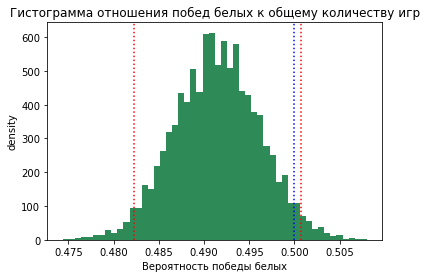

In [112]:
import matplotlib.pyplot as plt
np.random.seed(2004)

n_iter = 10000
confidence = 95
ratios = 0
obs = 0.5

bootstraps = []
for i in range(n_iter):
    bootstrap = np.random.choice(df["result"], size = len(df["result"]))
    bootstrap_mean = np.mean(bootstrap)
    bootstraps.append(bootstrap_mean)

b_left = np.percentile(bootstraps, (100 - confidence)/2)
b_right = np.percentile(bootstraps, (100 + confidence)/2)
print(b_left, b_right)
plt.hist(bootstraps, bins = 50, color = "seagreen")
plt.axvline(x = 0.5, color = "blue", linestyle = ":")
plt.axvline(x = b_left, color = "red", linestyle = ":")
plt.axvline(x = b_right, color = "red", linestyle = ":")
plt.title("Гистограмма отношения побед белых к общему количеству игр")  
plt.xlabel("Вероятность победы белых")  
plt.ylabel("density")
None

Вывод: на уровне значимости 95% нет оснований отвергать гипотезу H0 о том, что белые выигрывают с такой же частотой, что и чёрные.